# Assignment - 3

Name - Kibilson sahayaraj

**Introduction**

This assignment is about exploring various statistical techniques such as Curve Fit model  and Clustering.The data used for this assignment is taken from The World Bank Data portal which provides access to global economic and development statistics including World Development Indicators, International Debt Statistics,education and gender. The statistical techniques are performed using CO2 emission data under Climate Change indicator. The following codes give the detailed information about the techniques used for exploring the data.

**Installing the package**
1. To import the required data from The World Bank website 
2. The pip command looks for the package in PyPI and installs everything in current Python environment to ensure that requests will work.

In [37]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [38]:
#Importing the required packages

import wbgapi as wb
wb.series.info("EN.ATM.CO2E.PC")

import pandas as pd

**Dataset Creation**
1. Importing required packages to pull dataset 
2. Creating user defined function to derive and pre-process the dataset

In [39]:
ind_ids=['EN.ATM.CO2E.PC']
country_codes=['ARE','AUS','BEL','CAN','CHN','ESP','FRA','IND','IRQ','ITA','JPN','LBN','LKA','MEX','NAC','NPL','NZL',
               'PAK','PHL','QAT','SAU','THA','UKR','USA','ZAF']

In [40]:
#User defined function to create DataFrame

def get_data(ids, code):
    '''
    The function takes Id and Country codes as two arguments and pull dataset from Worldbank website.
    In addition to that it also pre-process the initial dataset and returns DataFrame in required format.
    '''
    
    my_dataframe=wb.data.DataFrame(ids,code,mrv=5)
    dset1=my_dataframe.reset_index()
    dset1.rename(columns = {'economy':'country'}, inplace = True)
    
    return dset1

In [41]:
# use of get_data()

dset1=get_data(ind_ids,country_codes)
dset1

,country,YR2014,YR2015,YR2016,YR2017,YR2018
0,ARE,19.951852,20.948092,21.307610,21.950614,20.797498
1,AUS,15.755876,15.786449,15.872080,15.738647,15.475516
2,BEL,8.043496,8.444061,8.323757,8.155491,8.179711
3,CAN,15.854138,15.651386,15.244747,15.385316,15.497065
4,CHN,7.212791,7.124223,7.071898,7.174948,7.352263
5,ESP,5.184067,5.517944,5.314295,5.654040,5.520350
6,FRA,4.592377,4.666087,4.686612,4.727576,4.619241
7,IND,1.649328,1.641198,1.648359,1.719190,1.799825
8,IRQ,4.906435,4.559451,4.707649,4.641200,4.895195
9,ITA,5.387311,5.563260,5.498165,5.437858,5.376374


**Analysis - Curve Fit**
1. Importing required packages to pull dataset 
2. Curve fitting and plotting the data points
3. Prediction with the fitted model

In [42]:
#Importing required packages

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [43]:
 # define the true objective function
def objective(x, a, b):
    return a * x + b

#Dataset for the plot
dset3=dset1.values

# choose the input and output variables
x, y = dset3[:, 2], dset3[:, -1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.97429 * x + 0.04422


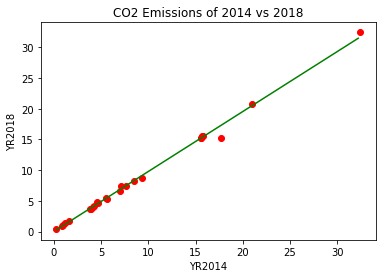

In [44]:
# plot input vs output
pyplot.scatter(x, y,color='red')
x_line = arange(min(x), max(x), 1)              # define a sequence of inputs between the smallest and largest known inputs
y_line = objective(x_line, a, b)                # calculate the output for the range
pyplot.plot(x_line, y_line,'-', color='green')  # create a line plot for the mapping function
pyplot.title('CO2 Emissions of 2014 vs 2018')   # Add title and axis names
pyplot.xlabel('YR2014')
pyplot.ylabel('YR2018')
pyplot.show()

# Prediction

In [45]:
#Prediction with the fitted model
#defining a funtion to predict

def fit_predict(x):
    '''
    The function returns predicted value for a particular input with the estimates of previous fitted model.
    '''
    return 0.97429 * x + 0.04422
    

In [46]:
pred_output = fit_predict(20)
print('Predicted value of x = 20 is : ',pred_output)

Predicted value of x = 20 is :  19.53002


**Analysis - Clustering**
1. Import required packages
2. It is necessary to normalize the data before clustering so that quality clusters are generated.
3. It becomes essential as Eucledian distance is very sensitive to the changes in differences.
4. sklearn library in python ontains efficient tools for machine learning and statistical modelling including classification,regression,clustering and dimensionality reduction.
5. k-means clustering is performed using sklearn library for generating clusters.

In [47]:
#importing packages
import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def norm(array):
    
    '''Returns array normalised to [0,1].Array can be a numpy array or a column of a dataframe'''
    
    mn_val = np.min(array)
    max_val = np.max(array)
    scaled = (array-mn_val) / (max_val-mn_val)
    
    return scaled

def norm_df(df):

    '''Returns all columns of the dataframe normalised to [0,1] with the exception the first (containing the country names) 
    Calls function norm to do the normalisation of one column, iterate over all columns'''
    
    for col in df.columns[1:]: # excluding the first column
        df[col] = norm(df[col])
        
        return df

In [49]:
#Read in and normalise

df_co=dset1
print('\nSummary statistics of dataset','\n')
print(df_co.describe())

print('\nCorrelation matrix\n','\n',df_co.corr())


print('\nNormalized dataset','\n')
# normalise result and inspect results
df_co2= norm_df(df_co)
print(df_co2.describe()) 


Summary statistics of dataset 

          YR2014     YR2015     YR2016     YR2017     YR2018
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean    8.609002   8.572590   8.495662   8.472233   8.396420
std     7.725511   7.736646   7.636538   7.622223   7.552697
min     0.264997   0.239126   0.342583   0.399165   0.428179
25%     3.808063   3.878195   3.885809   3.781216   3.741478
50%     5.387311   5.563260   5.498165   5.654040   5.520350
75%    15.755876  15.535342  15.131747  14.805882  15.240875
max    32.693532  32.470570  32.128042  32.179371  32.415639

Correlation matrix
 
           YR2014    YR2015    YR2016    YR2017    YR2018
YR2014  1.000000  0.998771  0.998149  0.996230  0.997249
YR2015  0.998771  1.000000  0.999659  0.998632  0.998021
YR2016  0.998149  0.999659  1.000000  0.999311  0.998417
YR2017  0.996230  0.998632  0.999311  1.000000  0.998848
YR2018  0.997249  0.998021  0.998417  0.998848  1.000000

Normalized dataset 

          YR2014     YR2015    

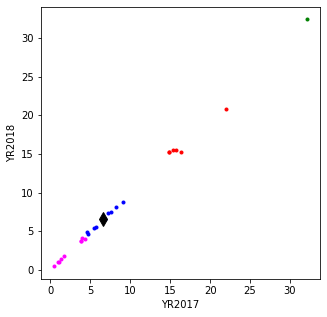

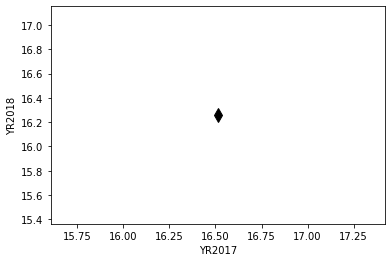

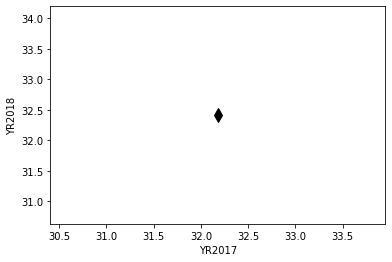

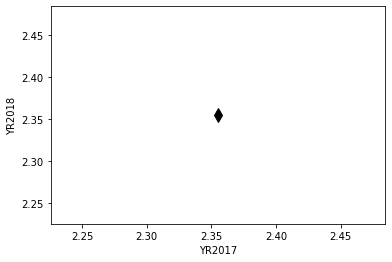

In [50]:
kmeans = cluster.KMeans(n_clusters=4)
# extract columns for fitting
df_fit = df_co2[["YR2017", "YR2018"]].copy()
kmeans.fit(df_fit)

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
pyplot.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green", "magenta"]
for l in range(4): # loop over the different labels
    pyplot.plot(df_fit["YR2017"][labels==l], df_fit["YR2018"][labels==l],"o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    pyplot.plot(xc, yc, "dk", markersize=10)
    pyplot.xlabel("YR2017")
    pyplot.ylabel("YR2018")
    pyplot.show()

**Conclusion**

    From the global data only few countries were selected and performed the statistical techniques, It could be found that the linear regression gives linear relationship between variables. 
    
    Since the data is small the clusters were less informative. The dataset with large number of observations could make the best classificaton.